In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos proporcionados
data = {
    "Año": [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Rusia": [3.756277391, 3.67083809, 3.300353647, 3.331237234, 3.246357234, 3.118542075, 3.14948602, 3.924063403, 3.58508572, 3.433043838, 3.689240435, 3.854042583, 4.112992978, 4.871514747, 5.425147705, 4.248996052, 3.71982244, 3.860337504, 4.171478901, 3.720451365, 4.056316332],
    "Ucrania": [1.984684246, 2.124209046, 1.9670586, 2.405748995, 2.387745638, 2.472527403, 2.302741144, 1.908981904, 1.902361022, 1.533641241, 1.613319917, 1.579291679, 2.245020521, 3.251180763, 3.154776603, 2.884401519, 3.192353265, 3.520152416, 3.811849481, 3.228346937, 33.546573]
}

df = pd.DataFrame(data)

# Calcular la razón de cambio anual del gasto militar
df['Cambio_Rusia'] = df['Rusia'].diff()
df['Cambio_Ucrania'] = df['Ucrania'].diff()

# Realizar regresión lineal múltiple para ajustar el modelo de las ecuaciones diferenciales
X = df[['Rusia', 'Ucrania']]  # Las variables independientes (gasto militar de ambos países)
y_rusia = df['Cambio_Rusia']  # La variable dependiente para Rusia
y_ucrania = df['Cambio_Ucrania']  # La variable dependiente para Ucrania

# Modelo de regresión lineal múltiple para Rusia
model_rusia = LinearRegression().fit(X.iloc[1:], y_rusia[1:])
coef_rusia = model_rusia.coef_
intercept_rusia = model_rusia.intercept_

# Modelo de regresión lineal múltiple para Ucrania
model_ucrania = LinearRegression().fit(X.iloc[1:], y_ucrania[1:])
coef_ucrania = model_ucrania.coef_
intercept_ucrania = model_ucrania.intercept_

# Paso 4: Resolver el sistema de ecuaciones diferenciales (más adelante en el código)
print(f"Rusia: x'(t) = -{coef_rusia[0]} * x + {coef_rusia[1]} * y + {intercept_rusia}")
print(f"Ucrania: y'(t) = {coef_ucrania[0]} * x - {coef_ucrania[1]} * y + {intercept_ucrania}")



Rusia: x'(t) = -0.31860892705906974 * x + 0.007133565834762976 * y + -1.2324099682595684
Ucrania: y'(t) = -0.3491081522947005 * x - 0.9708343725556693 * y + -1.020198998118101


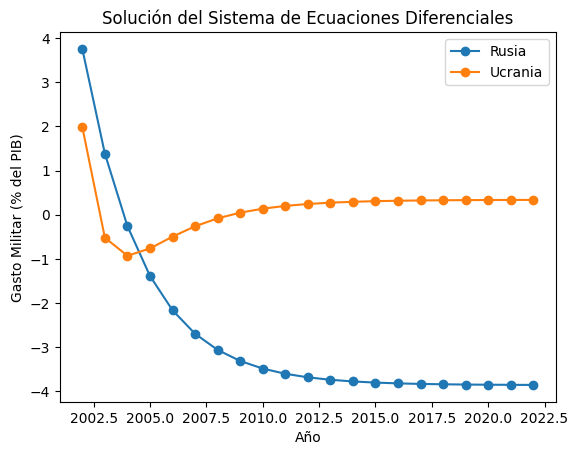

In [101]:
def runge_kutta(f,g,x0,y0,a,b,h):
    t=np.arange(a,b+h,h)
    n=len(t)
    x=np.zeros(n) 
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    for i in range(n-1):
        k1=h*f(x[i],y[i],t[i])
        l1=h*g(x[i],y[i],t[i])
        k2=h*f(x[i]+k1/2,y[i]+l1/2,t[i]+h/2)
        l2=h*g(x[i]+k1/2,y[i]+l1/2,t[i]+h/2)
        k3=h*f(x[i]+k2/2,y[i]+l2/2,t[i]+h/2)
        l3=h*g(x[i]+k2/2,y[i]+l2/2,t[i]+h/2)
        k4=h*f(x[i]+k3,y[i]+l3,t[i]+h)
        l4=h*g(x[i]+k3,y[i]+l3,t[i]+h)
        x[i+1]=x[i]+(1/6)*(k1+2*k2+2*k3+2*k4)
        y[i+1]=y[i]+(1/6)*(l1+2*l2+2*l3+2*l4)
        # Gráfica de las soluciones
    plt.plot(t, x, label='Rusia', marker='o', linestyle='-')
    plt.plot(t, y, label='Ucrania', marker='o', linestyle='-')
    plt.xlabel("Año")
    plt.ylabel("Gasto Militar (% del PIB)")
    plt.title("Solución del Sistema de Ecuaciones Diferenciales")
    plt.legend()
    plt.show()

a, b = coef_rusia  # Coeficientes para Rusia
q, r = coef_ucrania  # Coeficientes para Ucrania
c = intercept_rusia  # Intercepto para Rusia
s = intercept_ucrania  # Intercepto para Ucrania

f= lambda x,y,t: -a*x+b*y+c 
g= lambda x,y,t: q*x-r*y+s

xi = df['Rusia'].iloc[0]  # Primer valor en la columna 'Rusia'
yi= df['Ucrania'].iloc[0]  # Primer valor en la columna 'Rusia'


runge_kutta(f,g,xi,yi,2002,2022,1)
    

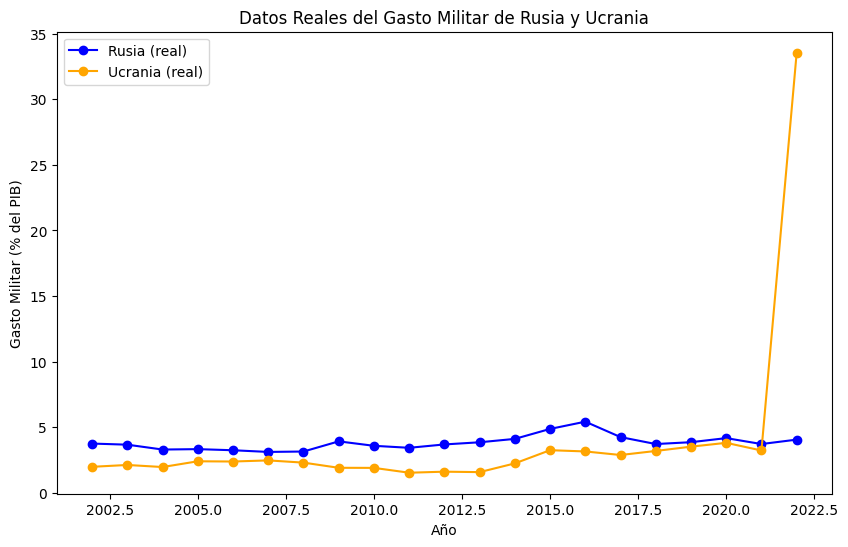

In [102]:
# Graficar los datos reales de gasto militar de Rusia y Ucrania

plt.figure(figsize=(10, 6))
plt.plot(df["Año"], df["Rusia"], label='Rusia (real)', marker='o', linestyle='-', color='blue')
plt.plot(df["Año"], df["Ucrania"], label='Ucrania (real)', marker='o', linestyle='-', color='orange')
plt.xlabel("Año")
plt.ylabel("Gasto Militar (% del PIB)")
plt.title("Datos Reales del Gasto Militar de Rusia y Ucrania")
plt.legend()
plt.show()
